In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [2]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [3]:
# no Servived
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 승객 정보
train.shape
test.shape

(418, 11)

In [5]:
# null 항목 표시
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

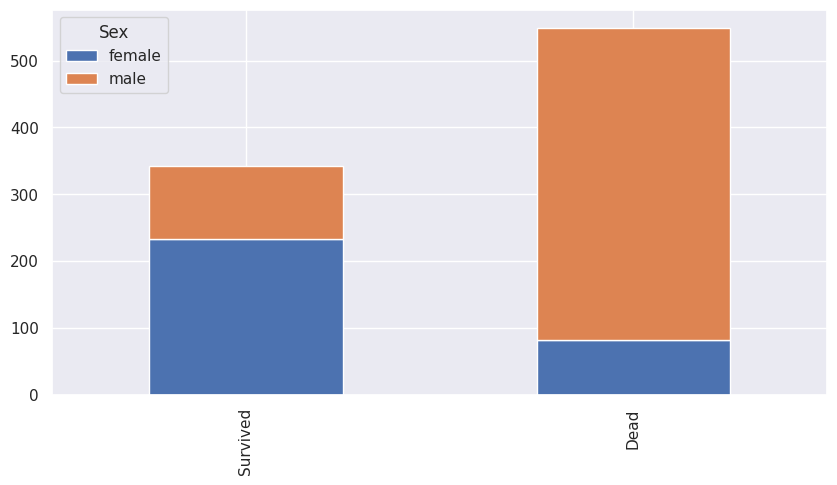

In [7]:
# 상대적으로 여성이 많이 살아남음
bar_chart('Sex')

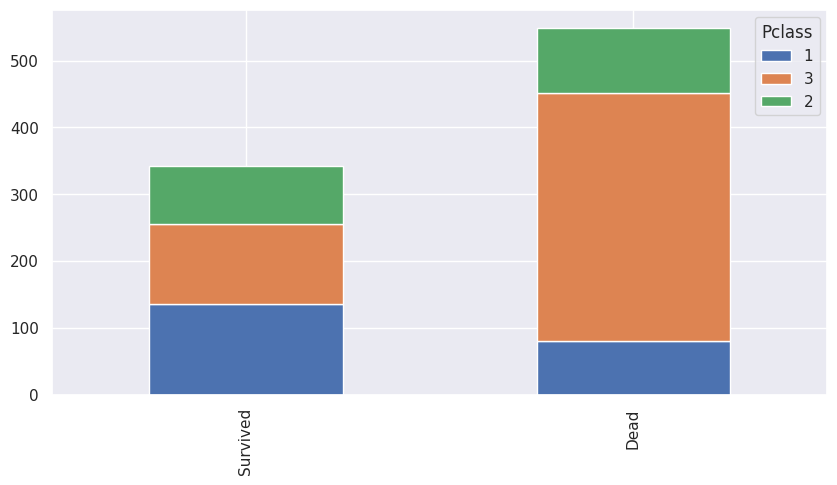

In [8]:
# 높은 클래스가 상대적으로 많이 살아남음
bar_chart('Pclass')

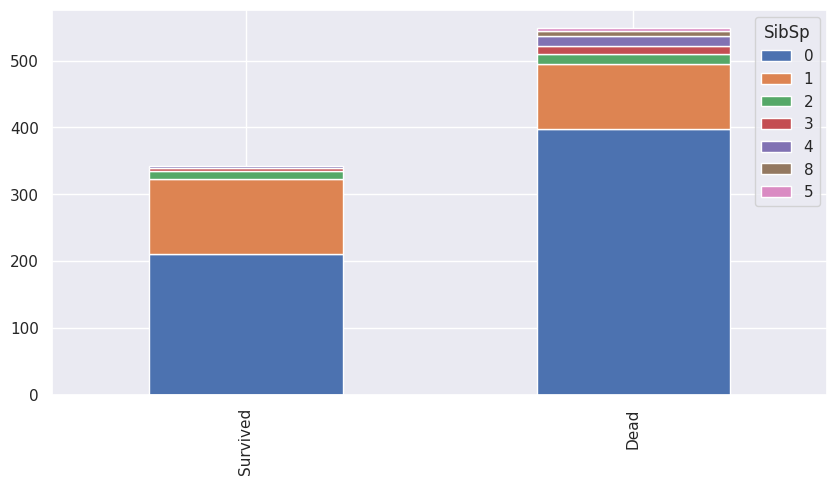

In [9]:
# 같이 탄 승객은 혼자 탄 승객보다 많이 살아남음
bar_chart('SibSp')

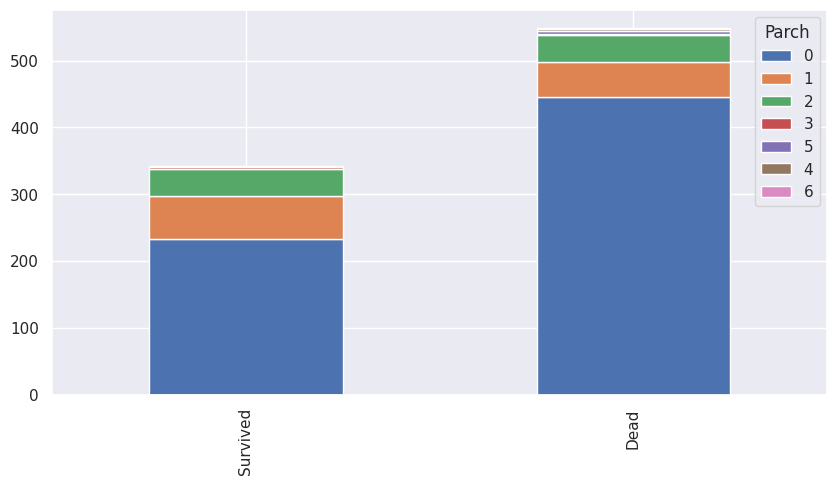

In [10]:
# 아이가 있다면 많이 살아남음
bar_chart('Parch')

# **이름정보 전처리 과정**

In [11]:
train_test_data = [train, test] # 한 번에 두 개의 데이터셋 적용

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [12]:
# Mr : 0, Miss : 1, Mrs: 2, Others: 3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
# 이름정보 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# **성별 전처리 과정**

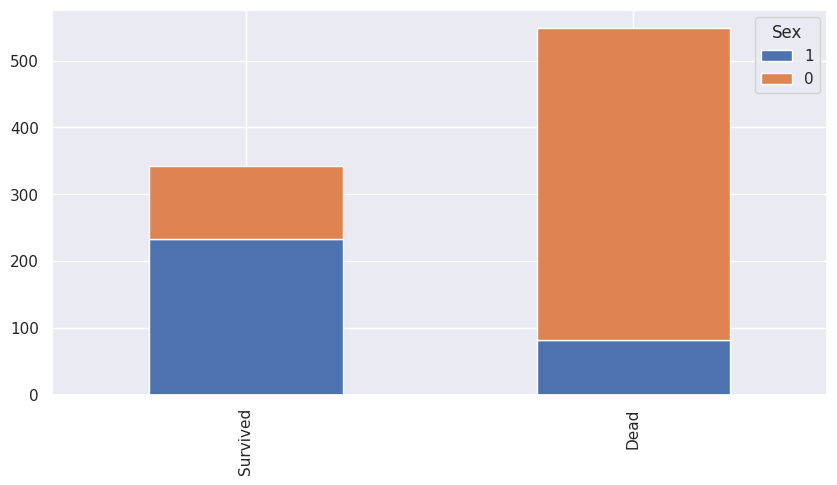

In [14]:
# male: 0 female: 1
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
bar_chart('Sex')

# **나이 전처리 과정**

/tmp/ipykernel_33/3231619695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
/tmp/ipykernel_33/3231619695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

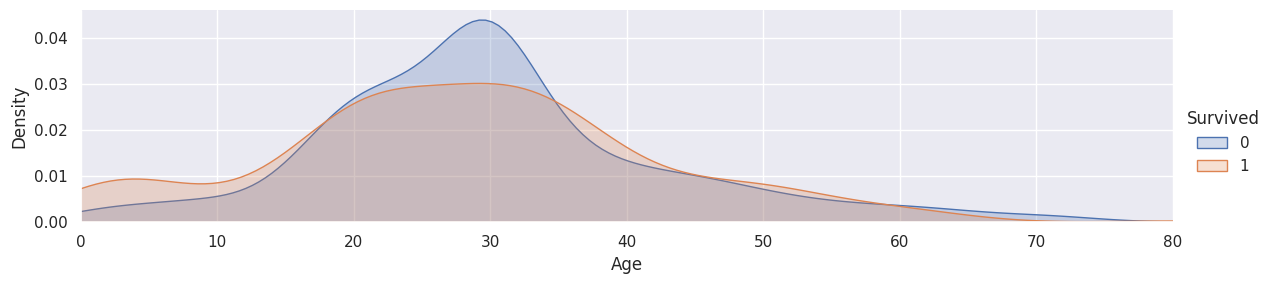

In [15]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [16]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


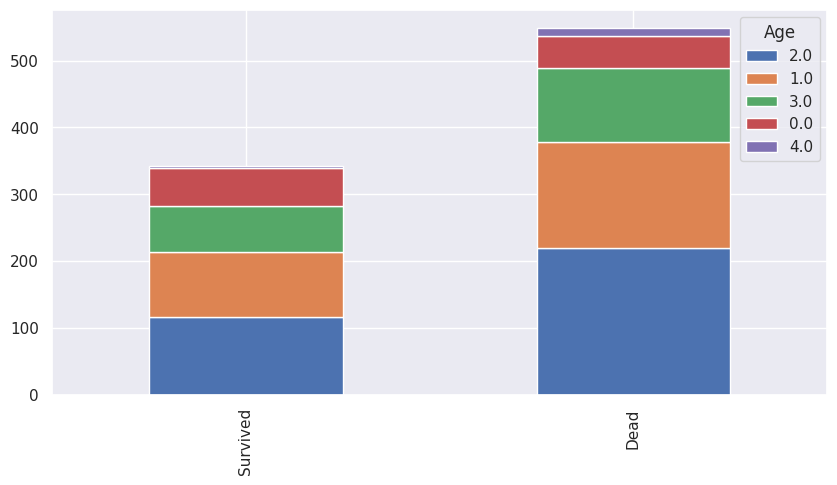

In [17]:
bar_chart('Age')

# **티켓**

In [18]:
import numpy as np

# 'Ticket' 열이 'A'인 데이터를 필터링
ticket_data = train[train['Ticket'].str.startswith('A')]

# 필터링된 데이터에서 생존 여부의 빈도를 계산
survived_counts = ticket_data['Survived'].value_counts()
survived_counts

Survived
0    27
1     2
Name: count, dtype: int64

In [19]:
# A, 4, 5, 6, 7, 8로 시작하는 'Ticket' 열의 데이터가 사망 확률 증가
train['TicketStart'] = np.where(train['Ticket'].str[0].isin(['A', '4', '5', '6', '7', '8']), 0, 3)
test['TicketStart'] = np.where(test['Ticket'].str[0].isin(['A', '4', '5', '6', '7', '8']), 0, 3)
train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TicketStart
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,3
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0,3
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0,3
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2,3
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2,3


# **가족유무 전처리 과정**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

(0.0, 11.0)

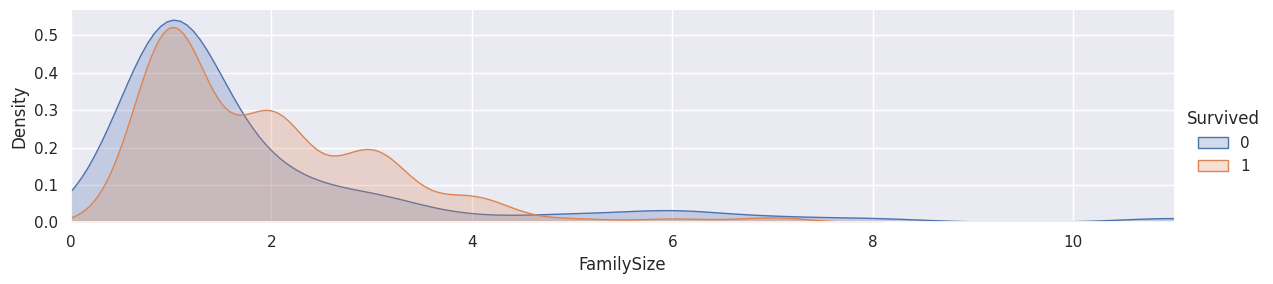

In [20]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [21]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TicketStart,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2,3,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,0.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2,3,0.4
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,3,0.0


In [22]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'Cabin', 'Fare','Embarked']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [23]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 6), (891,))

In [24]:
train_data.head(10)

,Pclass,Sex,Age,Title,TicketStart,FamilySize
0,3,0,1.0,0,0,0.4
1,1,1,3.0,2,3,0.4
2,3,1,1.0,1,3,0.0
3,1,1,2.0,2,3,0.4
4,3,0,2.0,0,3,0.0
5,3,0,2.0,0,3,0.0
6,1,0,3.0,0,3,0.0
7,3,0,0.0,3,3,1.6
8,3,1,2.0,2,3,0.8
9,2,1,0.0,2,3,0.4


# **머신러닝 모델링**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

**K-최근접 이웃**

In [26]:
# K-최근접 이웃 알고리즘
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K-교차 검증
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# kNN Score
round(np.mean(score)*100, 2)

[0.83333333 0.79775281 0.84269663 0.79775281 0.85393258 0.80898876
 0.83146067 0.85393258 0.83146067 0.83146067]


82.83

**랜덤 포레스트**

In [27]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Random Forest Score
round(np.mean(score)*100, 2)

[0.82222222 0.83146067 0.82022472 0.78651685 0.85393258 0.75280899
 0.84269663 0.83146067 0.78651685 0.83146067]


81.59

**서포트 벡터**

In [28]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# SVM Score
round(np.mean(score)*100,2)

[0.85555556 0.84269663 0.84269663 0.82022472 0.84269663 0.80898876
 0.83146067 0.85393258 0.83146067 0.85393258]


83.84

# **Testing**

In [29]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('result.csv', index=False)
submission = pd.read_csv('result.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
